In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt


# Clustering Embedings

In [2]:
embeddings_matrix = pd.read_csv('../data/02_interim/image_embeddings_matrix.csv', header=None)
embeddings_matrix.shape

(474, 1024)

In [3]:
image_results_df = pd.read_csv( "../data/02_interim/image_results.csv")
image_results_df = image_results_df[["lat","lon"]]
image_results_df.shape

(474, 2)

In [4]:
embeddings_matrix

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.172947,-0.087920,0.311514,-0.378930,0.371648,-0.146677,0.936442,0.007682,-0.074870,0.017992,...,-0.064590,0.126180,-0.082757,-0.059197,-0.073073,0.065889,-0.012861,0.066144,0.004592,0.109164
1,0.282191,-0.131781,0.555519,-0.425269,0.233957,0.056380,0.702789,-0.002001,-0.043222,0.041632,...,-0.018109,0.028234,0.038871,-0.013033,-0.040409,0.026142,-0.039914,0.091459,-0.018597,0.019887
2,0.259768,-0.149201,0.479077,-0.331304,0.130961,0.019831,0.611122,-0.019437,-0.069374,0.019576,...,-0.043207,0.086030,0.034934,-0.023349,0.063771,0.106099,-0.018082,0.033380,0.020758,0.081140
3,0.260868,-0.072569,0.476380,-0.351324,0.135284,-0.076456,0.636436,0.046691,-0.081169,0.047602,...,-0.064513,0.096189,0.016186,-0.008662,-0.068636,0.042732,-0.067640,0.070107,0.028358,-0.048838
4,0.228060,-0.068779,0.526474,-0.486239,0.198133,-0.008870,0.654265,0.047370,-0.058840,0.026129,...,-0.017925,0.132057,0.031708,0.010147,-0.009883,0.088773,0.014616,0.058730,0.038700,0.017737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.276002,0.017523,0.513263,-0.584871,0.214773,-0.054412,0.834677,-0.026777,-0.109575,0.032781,...,-0.039839,0.043613,-0.037428,-0.007739,0.003866,0.065101,0.021289,0.074430,0.012817,-0.049983
470,0.276235,-0.010428,0.524440,-0.502039,0.306812,-0.018056,0.893754,0.008473,-0.075007,0.038385,...,-0.042223,0.040645,-0.017791,-0.031795,-0.068450,0.046683,-0.013214,0.083126,0.024257,-0.053885
471,0.277944,-0.109035,0.545450,-0.505904,0.196599,0.015682,0.675462,0.025374,-0.049824,0.057092,...,-0.023463,0.032933,0.072058,-0.005188,-0.020755,0.071788,0.029356,0.088116,0.021603,-0.025861
472,0.257208,-0.082179,0.483540,-0.419950,0.187455,-0.011332,0.723483,0.039092,-0.060796,0.009061,...,-0.029156,0.060833,0.007981,-0.005619,-0.033785,0.063957,0.027781,0.050141,0.037685,-0.085850


## PCA

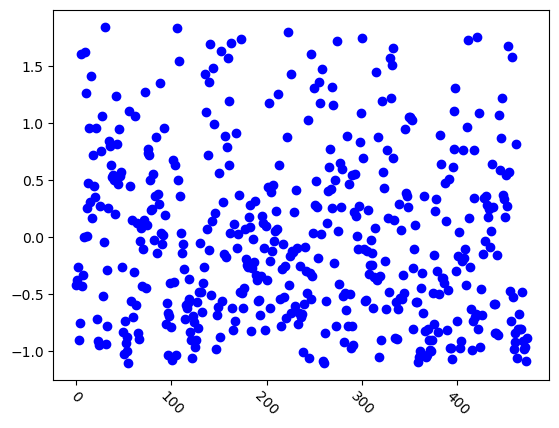

In [5]:
pca = decomposition.PCA(n_components=1)
pca_result = pca.fit_transform(embeddings_matrix)

plt.xticks(rotation=-45)

indices = np.arange(len(pca_result))

plt.scatter(indices, pca_result, color="blue")

In [6]:
pca_flat = pca_result.flatten()
pca_df = image_results_df[["lat", "lon"]].copy()
pca_df["pca_result"] = pca_flat


pca_df

,lat,lon,pca_result
0,24.45118,54.39696,-0.417218
1,34.52813,69.17233,-0.373100
2,41.32750,19.81889,-0.258130
3,40.18111,44.51361,-0.899530
4,-8.83682,13.23432,-0.746722
...,...,...,...
469,-29.12107,26.21400,-0.904789
470,-33.92584,18.42322,-0.975073
471,-15.40669,28.28713,-0.961974
472,-17.82772,31.05337,-1.082307


In [7]:
! pip install scikit-fuzzy

## Fuzzy C means

In [8]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np

n_clusters_list = [5, 10, 20]  # List of values for n_clusters

# Apply fuzzy C-means clustering
# The fuzz.cluster.cmeans function takes the following parameters:
# - data: the data points
# - c: number of clusters
# - m: fuzzy parameter (between 1 and 2)
# - error: error tolerance
# - maxiter: maximum number of iterations
# - init: initial membership matrix (optional)
# - seed: random seed for reproducibility (optional)
m = 2.0  # Fuzziness parameter
error = 0.005  # Error tolerance
maxiter = 1000  # Maximum iterations

# Empty DataFrame to store all results
all_membership_df = pd.DataFrame()

# Iterate over each value in the n_clusters list
for n_clusters in n_clusters_list:
    # Apply the fuzzy C-means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        embeddings_matrix.T,
        c=n_clusters,
        m=m,
        error=error,
        maxiter=maxiter,
        init=None,
        seed=42,
    )

    # Convert results to DataFrame and add to the final DataFrame
    membership_df = pd.DataFrame(u.T, columns=[f"Cluster_{n_clusters}_{i}" for i in range(n_clusters)])

    # Append the results of this iteration to the final DataFrame
    all_membership_df = pd.concat([all_membership_df, membership_df], axis=1)


all_membership_df



,Cluster_5_0,Cluster_5_1,Cluster_5_2,Cluster_5_3,Cluster_5_4,Cluster_10_0,Cluster_10_1,Cluster_10_2,Cluster_10_3,Cluster_10_4,...,Cluster_20_10,Cluster_20_11,Cluster_20_12,Cluster_20_13,Cluster_20_14,Cluster_20_15,Cluster_20_16,Cluster_20_17,Cluster_20_18,Cluster_20_19
0,0.199943,0.199860,0.200040,0.200124,0.200033,0.100021,0.099852,0.100068,0.100099,0.100019,...,0.049991,0.050045,0.050037,0.049996,0.050059,0.049936,0.050036,0.050129,0.049987,0.050072
1,0.199927,0.199813,0.200057,0.200161,0.200042,0.100036,0.099798,0.100097,0.100125,0.100019,...,0.049988,0.050061,0.050047,0.049996,0.050078,0.049910,0.050046,0.050170,0.049979,0.050096
2,0.199916,0.199790,0.200063,0.200183,0.200048,0.100036,0.099775,0.100108,0.100145,0.100027,...,0.049989,0.050065,0.050057,0.049993,0.050093,0.049902,0.050044,0.050187,0.049984,0.050108
3,0.199725,0.199326,0.200198,0.200596,0.200156,0.100107,0.099288,0.100336,0.100476,0.100088,...,0.049958,0.050213,0.050179,0.049976,0.050292,0.049689,0.050157,0.050623,0.049940,0.050351
4,0.199776,0.199447,0.200164,0.200487,0.200127,0.100092,0.099412,0.100280,0.100387,0.100070,...,0.049967,0.050174,0.050148,0.049981,0.050241,0.049743,0.050124,0.050507,0.049952,0.050287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.199795,0.199497,0.200146,0.200445,0.200117,0.100078,0.099470,0.100247,0.100356,0.100067,...,0.049967,0.050160,0.050132,0.049982,0.050216,0.049769,0.050122,0.050466,0.049953,0.050261
470,0.199742,0.199370,0.200183,0.200559,0.200147,0.100097,0.099338,0.100308,0.100448,0.100084,...,0.049958,0.050201,0.050166,0.049978,0.050270,0.049712,0.050155,0.050586,0.049941,0.050328
471,0.199703,0.199270,0.200215,0.200644,0.200168,0.100118,0.099228,0.100366,0.100514,0.100093,...,0.049954,0.050231,0.050194,0.049974,0.050317,0.049662,0.050168,0.050675,0.049934,0.050380
472,0.199712,0.199298,0.200205,0.200623,0.200163,0.100109,0.099260,0.100348,0.100499,0.100094,...,0.049956,0.050222,0.050188,0.049973,0.050306,0.049678,0.050163,0.050651,0.049939,0.050366


In [ ]:
all_membership_df = pd.concat([image_results_df, all_membership_df], axis=1)
all_membership_df.columns

Index(['lat', 'lon', 'Cluster_5_0', 'Cluster_5_1', 'Cluster_5_2',
       'Cluster_5_3', 'Cluster_5_4', 'Cluster_10_0', 'Cluster_10_1',
       'Cluster_10_2', 'Cluster_10_3', 'Cluster_10_4', 'Cluster_10_5',
       'Cluster_10_6', 'Cluster_10_7', 'Cluster_10_8', 'Cluster_10_9',
       'Cluster_20_0', 'Cluster_20_1', 'Cluster_20_2', 'Cluster_20_3',
       'Cluster_20_4', 'Cluster_20_5', 'Cluster_20_6', 'Cluster_20_7',
       'Cluster_20_8', 'Cluster_20_9', 'Cluster_20_10', 'Cluster_20_11',
       'Cluster_20_12', 'Cluster_20_13', 'Cluster_20_14', 'Cluster_20_15',
       'Cluster_20_16', 'Cluster_20_17', 'Cluster_20_18', 'Cluster_20_19'],
      dtype='object')

In [10]:
all_membership_df.to_csv("../data/02_interim/image_results_v2.csv", index=False)